# Instructions to use


* To run a cell in **Google Colab**: press **Ctrl + Enter** to run the current cell, or **Shift + Enter** to run and move to the next cell.
* If you see `NameError: name '...' is not defined` (“variable not found”), it usually means the cell that creates that variable hasn’t been run yet (or the runtime restarted). Run the cells above, or use **Runtime → Run all** (or **Runtime → Run before**) to run everything in order.
* If Colab disconnects (e.g., after being idle or a long run): go to **Runtime → Reconnect**. If it still fails, use **Runtime → Restart runtime**, then **Runtime → Run all**.


# Importing Necessary Libraries

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Download the dataset

In [2]:
data_url = "https://raw.githubusercontent.com/rakaar/workshop/refs/heads/main/workshop_dataset_2AFC.csv"
df = pd.read_csv(data_url)

df.head() # printing first 5 rows of dataset

,right_db,left_db,RT,choice
0,20.5,19.5,0.168945,1.0
1,28.0,12.0,0.167969,1.0
2,19.0,21.0,0.525391,1.0
3,16.0,24.0,0.146484,-1.0
4,24.0,16.0,0.118164,1.0


The dataset has the following columns:
* `right_db`: sound level (in dB) presented to the **right ear**
* `left_db`: sound level (in dB) presented to the **left ear**
* `choice`: the mouse’s decision (**+1 = right poke**, **−1 = left poke**)
* `RT`: reaction time in **seconds** (time taken to make the choice)

**Task (2AFC: “Which side is louder?”)**
On each trial, the rat hears one sound level in each ear and must choose the side with the **higher** sound level.

**Reward rule**

* If `right_db > left_db`, the correct choice is `+1` (right).
* If `left_db > right_db`, the correct choice is `−1` (left).
  Correct choices are rewarded with water; incorrect choices are not.


# How good is the rat at the task? - Psychometric function

To see what difficulty levels are present in the dataset, we compute the **signed stimulus difference**

$$
\text{difficulty} = \text{right\_db} - \text{left\_db}
$$

Positive values mean the right ear was louder; negative values mean the left ear was louder. We'll first list the unique difficulty values in the dataset.

In [3]:
difficulty_levels = sorted((df["right_db"] - df["left_db"]).unique())
for level in difficulty_levels:
    print(f'Right - Left = {level} dB')

Right - Left = -16.0 dB
Right - Left = -8.0 dB
Right - Left = -4.0 dB
Right - Left = -2.0 dB
Right - Left = -1.0 dB
Right - Left = 1.0 dB
Right - Left = 2.0 dB
Right - Left = 4.0 dB
Right - Left = 8.0 dB
Right - Left = 16.0 dB


As you can see, the **signed difference** `right_db − left_db` takes values from **−16 dB to +16 dB**, mostly in steps that double (… −1, −2, −4, −8, −16 and +1, +2, +4, +8, +16).

* When `right_db − left_db` is **large and positive**, the **right** side is clearly louder, so the mouse should usually choose the **right** poke.
* When `right_db − left_db` is **large and negative**, the **left** side is clearly louder, so the mouse should usually choose the **left** poke.
* When the difference is **close to 0**, the trial is harder, so we expect **more errors** and choices closer to **50–50**.

To visualize this, we plot a **psychometric function**:
**x-axis:** `difficulty = right_db − left_db` (dB)
**y-axis:** `P(choose right)` (probability of choosing the right poke)

Your task: **complete the code to plot** `P(choose right)` as a function of `difficulty`.


## Exercise 1 - Complete Psychometric Function

In [4]:
# %%%
def plot_psychometric_function(df):
    """
    To plot a psychometric, we need
    - difficulty: right dB - left_dB on x-axis
    - prob of choosing right poke on y-axis

    return difficulty, prob_right_vector
    """

    # TODO-1: find out the range of difficulty ( hint: unique() and sort() as above)
    
    # TODO 2: 
    # for d in difficulty:
        # filter trials based on difficulty

        # calc total num of trials

        # calc num of trials where choice = 1

        # prob of choosing right = num of trials where choice = 1 / total num of trials

        # append it to array

    # return difficulty, prob_right_vector
    pass

## Exercise 1 Solution

In [5]:
def plot_psychometric_function(df):
    """
    To plot a psychometric, we need
    - difficulty: right dB - left_dB on x-axis
    - prob of choosing right poke on y-axis

    return difficulty, prob_right_vector
    """

    # TODO-1: find out the range of difficulty ( hint: unique() and sort() as above)
    difficulty = (df['right_db'] - df['left_db']).unique()
    difficulty.sort()
    # TODO 2: 
    prob_right_vector = []
    for d in difficulty:
        # filter trials based on difficulty
        trials_with_d = df[df['right_db'] - df['left_db'] == d]

        # calc total num of trials
        total_trials = len(trials_with_d)

        # calc num of trials where choice = 1
        num_trials_choice_1 = len(trials_with_d[trials_with_d['choice'] == 1])

        # prob of choosing right = num of trials where choice = 1 / total num of trials
        prob_right = num_trials_choice_1 / total_trials

        # append it to array
        prob_right_vector.append(prob_right)

    # return difficulty, prob_right_vector
    return difficulty, prob_right_vector


## We run the psychometric function and plot it

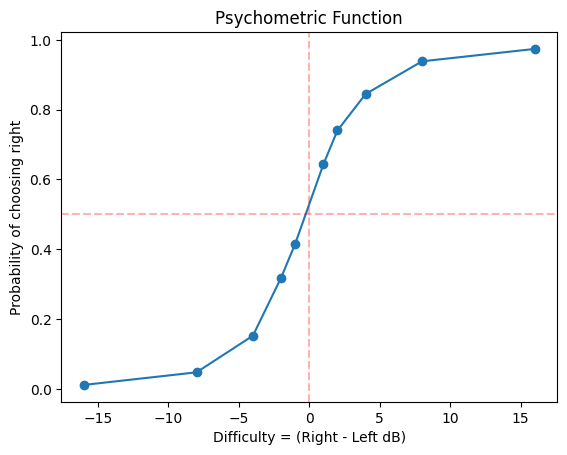

In [8]:
difficulty, prob_right_vector = plot_psychometric_function(df)
plt.plot(difficulty, prob_right_vector, '-o')
plt.xlabel('Difficulty = (Right - Left dB)')
plt.ylabel('Probability of choosing right')
plt.axvline(x=0, color='r', linestyle='--', alpha=0.3)
plt.axhline(y=0.5, color='r', linestyle='--', alpha=0.3)
plt.title('Psychometric Function')
plt.show()

# How fast the rat is ? - Chronometric function



 To quantify how response speed depends on stimulus strength, we can plot the **mean reaction time (RT)** as a function of **difficulty** . We expect a **chronometric function**: on **easy trials** (small difference between right and left sound levels), the rat responds faster (lower RT), whereas on **hard trials** (small difference between right and left sound), the rat responds more slowly (higher RT).

 To make things easy to visualize, we can use the absolute value of the signed difference `right_db - left_db` as a proxy for difficulty. As both are equally difficult just with change of side. So we add a new column in our database called `abs_difficulty` to make things easier.


In [14]:
df['abs_difficulty'] = abs(df['right_db'] - df['left_db'])
df.head()

,right_db,left_db,RT,choice,abs_difficulty
0,20.5,19.5,0.168945,1.0,1.0
1,28.0,12.0,0.167969,1.0,16.0
2,19.0,21.0,0.525391,1.0,2.0
3,16.0,24.0,0.146484,-1.0,8.0
4,24.0,16.0,0.118164,1.0,8.0


## Exercise 2 - Complete the Chronometric function

In [ ]:
def plot_chronometric_function(df):
    """
    To plot a chronometric, we need
    - abs difficulty: right dB - left_dB on x-axis
    - mean RT on y-axis

    return difficulty, mean_rt_vector
    """
    # TODO 1: find the unique difficulty


    # TODO 2: calculate the mean RT for each difficulty
    
    # return abs_difficulties, mean_RT_vector
    pass


## Exercise 2 - Solution

In [16]:
def plot_chronometric_function(df):
    """
    To plot a chronometric, we need
    - abs difficulty: right dB - left_dB on x-axis
    - mean RT on y-axis

    return difficulty, mean_rt_vector
    """
    # TODO 1: find the unique difficulty
    abs_difficulties = sorted(df['abs_difficulty'].unique())


    # TODO 2: calculate the mean RT for each difficulty
    mean_RT_vector = []
    for abs_d in abs_difficulties:
        # get the trials related to abs difficult
        df_abs_diff = df[df['abs_difficulty'] == abs_d]
        
        # calculate the mean
        mean_RT = df_abs_diff['RT'].mean()
        
        # append it to array
        mean_RT_vector.append(mean_RT)
    
    return abs_difficulties, mean_RT_vector


## Running and plotting the chronometric function

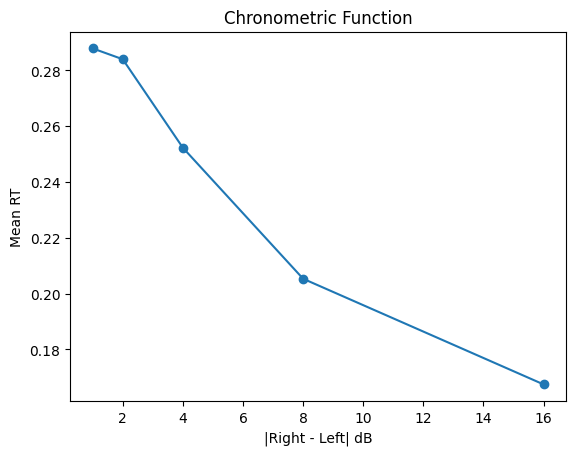

In [19]:
abs_difficulties, mean_RT_vector = plot_chronometric_function(df)

plt.plot(abs_difficulties, mean_RT_vector, '-o')
plt.xlabel('|Right - Left| dB')
plt.ylabel('Mean RT')
plt.title('Chronometric Function')
plt.show()